In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.3f" % x)


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

import sys

sys.path.append("../src")


In [5]:
def load_dataframe():
    dataframe = pd.read_csv(r"D:\end_to_end_mlproject\notebook\data\cleaned_student_data.csv")
    return dataframe

In [6]:
df = load_dataframe()

In [7]:
from utils import grab_col_names

In [8]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations : 395
Variables : 47
cat_cols : 39
num_cols : 8
cat_but_car : 0
num_but_cat : 22


In [9]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Total_Score,Average_Score,has_failures,high_studytime,avg_parent_edu,early_failure,parents_together,big_family,urban_student,long_travel,has_internet,romantic_rel,high_alcohol_use,high_absenteeism
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6.000,5,6,6,17,5.667,0,0,4.000,0,0,1,1,0,0,0,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4.000,5,5,6,16,5.333,0,0,1.000,0,1,1,1,0,1,0,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10.000,7,8,10,25,8.333,1,0,1.000,0,1,0,1,0,1,0,0,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2.000,15,14,15,44,14.667,0,1,3.000,0,1,1,1,0,1,1,0,0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4.000,6,10,10,26,8.667,0,0,3.000,0,1,1,1,0,0,0,0,0


In [10]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

def one_hot_encoder(dataframe, categoricel_col, drop_first=False):
    dataframe = pd.get_dummies(dataframe,columns=categoricel_col, drop_first=drop_first)
    return dataframe

In [11]:
binary_col = [col for col in df.columns if df[col].nunique()==2 and df[col].dtypes == "O"]
binary_col

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [12]:
for col in binary_col:
    df = label_encoder(df,col)

In [13]:
df= one_hot_encoder(df,cat_cols,drop_first=True)

In [23]:
num_cols = ['age', 'absences', 'G1', 'G2', 'G3', 'Total_Score', 'Average_Score', 'avg_parent_edu']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [24]:
df.head()

,age,absences,G1,G2,G3,Total_Score,Average_Score,avg_parent_edu,school_1,sex_1,address_1,famsize_1,Pstatus_1,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_1,famsup_1,paid_1,activities_1,nursery_1,higher_1,internet_1,romantic_1,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_1,Fedu_2,Fedu_3,Fedu_4,traveltime_2,traveltime_3,traveltime_4,studytime_2,studytime_3,studytime_4,failures_1,failures_2,failures_3,famrel_2,famrel_3,famrel_4,famrel_5,freetime_2,freetime_3,freetime_4,freetime_5,goout_2,goout_3,goout_4,goout_5,Dalc_2,Dalc_3,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5,has_failures_1,high_studytime_1,early_failure_1,parents_together_1,big_family_1,urban_student_1,long_travel_1,has_internet_1,romantic_rel_1,high_alcohol_use_1,high_absenteeism_1
0,1.023,0.057,-1.782,-1.255,-0.965,-1.358,-1.358,1.389,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False
1,0.238,-0.221,-1.782,-1.521,-0.965,-1.448,-1.448,-1.665,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False,True,False,False,False
2,-1.331,0.614,-1.179,-0.722,-0.091,-0.635,-0.635,-1.665,False,False,True,True,True,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,True,False,True,True,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,True,False,True,False,False,True
3,-1.331,-0.500,1.234,0.875,1.002,1.080,1.080,0.371,False,False,True,False,True,True,False,False,False,False,False,True,False,True,False,False,True,False,False,True,True,True,True,True,True,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,True,True,False,True,True,False,False
4,-0.546,-0.221,-1.481,-0.190,-0.091,-0.545,-0.545,0.371,False,False,True,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,True,False,False,False,False,False


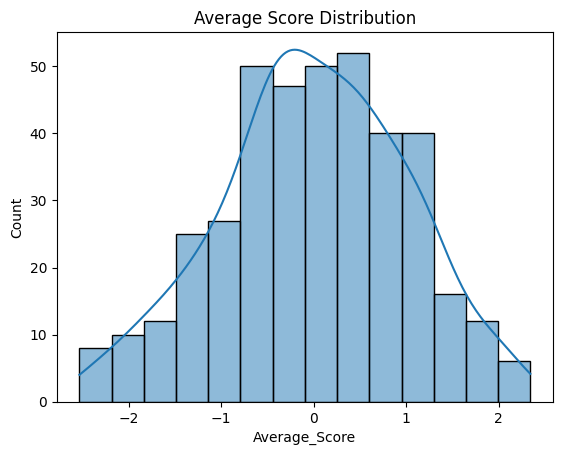

In [25]:
sns.histplot(df['Average_Score'], kde=True)
plt.title("Average Score Distribution")
plt.show()

In [26]:
X = df.drop(["Average_Score", "Total_Score", "G1", "G2", "G3"], axis=1)
y = df["Average_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square


In [31]:
models ={
    "Linear_Regression":LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

In [37]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score : {:.4f}".format(model_train_r2))

    print("###################################")

    print("Model performance for Test set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score : {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("*"*35)
    print("\n")

Linear_Regression
Model performance for Training set
- Root Mean Squared Error: 0.7596
- Mean Absolute Error: 0.5850
- R2 Score : 0.4099
###################################
Model performance for Test set
- Root Mean Squared Error: 0.9889
- Mean Absolute Error: 0.8063
- R2 Score : 0.0995
***********************************


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.9889
- Mean Absolute Error: 0.7883
- R2 Score : 0.0000
###################################
Model performance for Test set
- Root Mean Squared Error: 1.0437
- Mean Absolute Error: 0.8791
- R2 Score : -0.0030
***********************************


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.7624
- Mean Absolute Error: 0.5904
- R2 Score : 0.4056
###################################
Model performance for Test set
- Root Mean Squared Error: 0.9481
- Mean Absolute Error: 0.7895
- R2 Score : 0.1723
***********************************


K-Neighbors Regressor
Model performance for T

In [39]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model_name", "R2_Score"]).sort_values(by=["R2_Score"],ascending=False)

,Model_name,R2_Score
5,Random Forest Regressor,0.232
7,CatBoosting Regressor,0.193
2,Ridge,0.172
8,AdaBoost Regressor,0.114
6,XGBRegressor,0.110
0,Linear_Regression,0.100
3,K-Neighbors Regressor,0.008
1,Lasso,-0.003
4,Decision Tree,-0.681
